In [39]:
import logging
import typing

from os import getcwd, listdir
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

from indoorca.simulator.core import IndoorORCASim, IndoorOrcaSimConfig
from indoorca.environment.core import Environment
from indoorca.processing.core import MapProcessor

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sim = IndoorORCASim(IndoorOrcaSimConfig())
pix_per_meter = 100

In [4]:

#Get maps from data/maps
maps = []
map_path = getcwd() + '/../data/maps/'
for map_name in listdir(map_path):
    im = Image.open(map_path + map_name)
    maps.append(np.asarray(im))

In [5]:
test = maps[-1]

In [6]:
test.shape

(1000, 1000)

In [34]:
env = Environment('test', test)

In [35]:
_, reachable_trav_map = env.build_graph(env.map)
# self._obstacles_polygons = self._get_obstacle_polygons(reachable_trav_map)
# self.get_obstacles()
# self._construct_obstacle_map()


In [36]:
env._obstacles_polygons = env._get_obstacle_polygons(reachable_trav_map)

In [37]:
env.get_obstacles()

In [50]:
height = env.map.shape[0]
width = env.map.shape[1]

#Initialize map as all freespace
obstacle_map = np.ones((height, width)) #* indoorca.free_space



# Iterate through each polygon
for obs_pixel in env.obstacles_pixels:
    # Convert the meter coordinates to pixels
    np_obs_pixel = np.array([obs_pixel], dtype=np.int32)
    print(np_obs_pixel.shape)
    print(np_obs_pixel)
    

    # Fill the obstacle polygon with 0 (non-traversable)
    cv2.fillPoly(obstacle_map, np_obs_pixel, 0)#indoorca.obstacle_space)
         

(1, 12, 2)
[[[  0 207]
  [ 70 208]
  [  5 210]
  [  7 435]
  [169 434]
  [168 209]
  [104 208]
  [179 208]
  [179 446]
  [192 446]
  [192   0]
  [  0 207]]]
(1, 9, 2)
[[[416  74]
  [424  50]
  [482  49]
  [482   1]
  [339   1]
  [339  50]
  [389  50]
  [391  70]
  [416  74]]]
(1, 6, 2)
[[[497   0]
  [489   1]
  [491  38]
  [567  36]
  [567   0]
  [497   0]]]
(1, 5, 2)
[[[337  39]
  [337   1]
  [246   2]
  [247  40]
  [337  39]]]
(1, 5, 2)
[[[238 101]
  [238  31]
  [194  31]
  [194 101]
  [238 101]]]
(1, 6, 2)
[[[387 194]
  [396 179]
  [394 107]
  [306 109]
  [306 192]
  [387 194]]]
(1, 5, 2)
[[[292 321]
  [293 139]
  [197 137]
  [195 321]
  [292 321]]]
(1, 5, 2)
[[[579 335]
  [579 170]
  [524 169]
  [523 335]
  [579 335]]]
(1, 11, 2)
[[[349 342]
  [367 340]
  [377 319]
  [377 240]
  [364 222]
  [339 218]
  [324 222]
  [315 240]
  [315 321]
  [330 338]
  [349 342]]]
(1, 5, 2)
[[[235 373]
  [238 332]
  [195 328]
  [194 373]
  [235 373]]]
(1, 17, 2)
[[[580 380]
  [571 395]
  [576 368]
  [

In [51]:
def display_binary_map(binary_map):
    plt.figure(figsize=(10, 10))
    plt.imshow(binary_map*255, cmap='gray', origin='lower')
    plt.xticks([])
    plt.yticks([])
    plt.show()

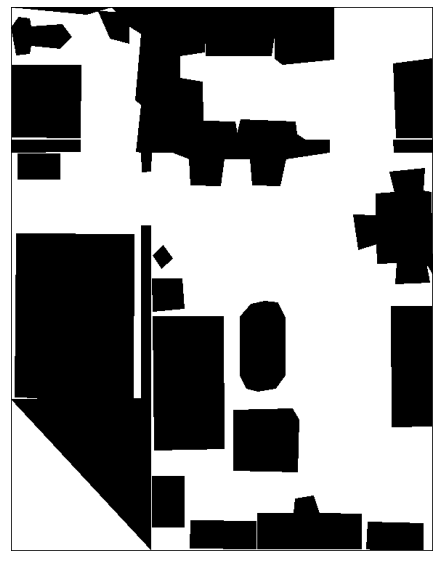

In [52]:
display_binary_map(obstacle_map)

In [53]:
env.obstacle_map = obstacle_map

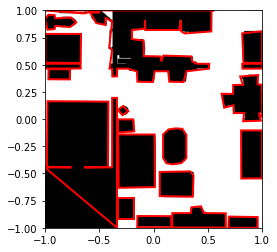

In [54]:
env.display_map_with_polygons()

In [62]:
env.compute_trav_map()


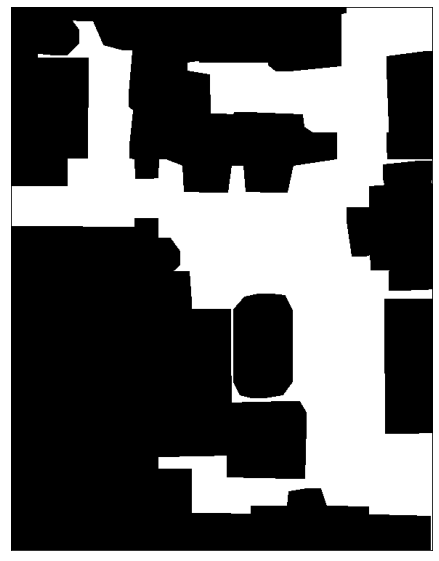

In [63]:
display_binary_map(env.trav_map)

In [136]:
env.obstacle_map.min()

1.0

In [137]:
env.obstacle_map

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Map logic

0. Compute the single biggest connected component with Environment? probably add this to map processing
1. Get obstacle polygons
   1. pad with 0s to catch corners, 
   2. check the flipping
   3. Remove 0 padding or 0s in corners
2. Use obstacle polygons to make new map
   1. Maybe add exterior walls as obstacles?
3. Use new map to compute traversability map and graph
4. Load obstacles into ORCA
5. Use traversability map for visualization

In [106]:
def display_binary_map(binary_map):
    plt.figure(figsize=(10, 10))
    plt.imshow(binary_map*255, cmap='gray', origin='lower')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
from matplotlib.patches import Polygon as mplPolygon


def display_map_with_polygons(binary_image, polygons, polygon_color='red'):
    fig, ax = plt.subplots()

    # Display the binary map
    ax.imshow(binary_image, cmap='gray', extent=(-1, 1, -1, 1), origin='lower')

    # Plot the polygons
    for polygon in polygons:
        coords = list(polygon.exterior.coords)
        coords_tuples = [(x, y) for x, y in coords]

        # Ensure the coordinates have at least 3 points to form a valid polygon
        if len(coords_tuples) < 3:
            continue

        mpl_polygon = mplPolygon(coords_tuples, edgecolor=polygon_color, facecolor='none', linewidth=2)
        ax.add_patch(mpl_polygon)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    plt.show()